# Capstone Project - The Battle of Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

# Choosing the best area of Winnipeg to live with children

### Part 2. Determining the distance between schools.

### Part 1. Choosing the safest areas of Winnipeg in
https://github.com/LiliyaUfa80/Capstone-Project---The-Battle-of-Neighborhoods-Week-2-/blob/master/Choosing_the_safest_areas_Winnipeg.ipynb


Let's explore how close the elementary and secondary schools in the selected areas are to each other so that the distance and time to go to school does not increase after during the transition from eighth to ninth grade. 

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [507]:
import seaborn as sns

In [508]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [509]:
from itertools import combinations

In [9]:
import math

In [511]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [519]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes

import folium

print('Folium installed and imported!')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::certifi-2019.9.11-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::ca-certificates-2019.8.28-0
  - anaconda/win-64::certifi-2019.9.11-py37_0, defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0
  - defaults/win-64::ca-certificates-2019.8.28-0, defaults/win-64::certifi-2019.9.11-py37_0, defaults/win-64::openssl-1.1.1d-he774522_2
  - anaconda/win-64::ca-certificates-2019.8.28-0, anaconda/win-64::openssl-1.1.1d-he774522_2, defaults/win-64::certifi-2019.9.11-py37_0
  - anaconda

In the first part, we selected two school division to study: 

the Louis Riel School Division, 

the Pembina Trails School Division.

Upload data for these schools:

I used websites is a school division in Winnipeg: https://www.lrsd.net/School/Community-of-Schools/Pages/default.aspx (the Louis Riel School Division)  
and https://www.pembinatrails.ca/School/SchoolList/Pages/default.aspx (Pembina Trails School Division). Reviews for each school I found on the site: https://www.google.ru/maps/place/, to be clear, I indicated the number of those who evaluated this school.

In [561]:
tables  = pd.read_html("https://www.lrsd.net/School/Community-of-Schools/Pages/default.aspx")
tables[0]

,0,1,2,3
0,Arc​hwood School,800 Archibald St.,(204) 233-7983,English
1,Collège Béliveau,296 Speers Rd.,(204) 255-3205,French Immersion
2,Collège Jeanne-Sauvé,1128 Dakota St.,(204) 257-0124,French Immersion
3,Dakota Collegiate,661 Dakota St.,(204) 256-4366,English
4,Darwin School,175 Darwin St.,(204) 257-2904,English
5,Dr. D. W. Penner School,121 Hazelwood Cres.,(204) 256-1135,English
6,Frontenac School,866 Autumnwood Dr.,(204) 257-0609,English
7,General Vanier School,18 Lomond Blvd.,(204) 255-1400,English
8,École George-McDowell,366 Paddington Rd.,(204) 253-1492,French Immersion
9,Glenlawn Collegiate,770 St. Mary's Rd.,(204) 233-3986,English


In [562]:
df2=pd.DataFrame(tables[0])

In [115]:
df_LR = pd.read_excel('D:\Louis_Riel_Sch.xlsx')

In [564]:
df_LR.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Archwood School (Grade: K-8)
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Collège Béliveau (Grade: 7-12)
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,Collège Jeanne-Sauvé (Grade: 9-12)
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Dakota Collegiate (Grade: 9-12)
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Darwin School (Grade: K-8)


In [565]:
df_LR1=df_LR.rename(columns = {"Unnamed: 0": "School_name", "Unnamed: 1":"Adres", "Unnamed: 2":"Phone_Number",
                                       "Unnamed: 3":"Program", "Unnamed: 4":"Grade","Unnamed: 5":"Description"})
df_LR1.head()

,School_name,Adres,Phone_Number,Program,Grade,Description
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Archwood School (Grade: K-8)
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Collège Béliveau (Grade: 7-12)
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,Collège Jeanne-Sauvé (Grade: 9-12)
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Dakota Collegiate (Grade: 9-12)
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Darwin School (Grade: K-8)


In [566]:
df = pd.read_excel('D:\Addresses_Sch.xlsx')
print("Column headings:")
print(df.columns)

Column headings:
Index(['Neighbourhood', 'Ward', 'School_Division', 'Latitude', 'Longitude',
       'Adres'],
      dtype='object')


In [567]:
df.head()

,Neighbourhood,Ward,School_Division,Latitude,Longitude,Adres
0,Sage Creek,St. Vital,Louis Riel,49.837256,-97.034510,11Vireo
1,Sage Creek,St. Vital,Louis Riel,49.838318,-97.041237,19GreyHeron
2,Bridgwater Trails,Waverley West,Pembina Trails,49.781129,-97.205291,118Arbourwood
3,Fraipont,St. Vital,Louis Riel,49.824315,-97.051935,162Crestmont
4,Ridgewood South,Charleswood - Tuxedo - Westwood,Pembina Trails,49.840493,-97.311494,95Dedrick


In [568]:
inner_LR = df_LR1.merge(df)

In [569]:
inner_LR.head() 

,School_name,Adres,Phone_Number,Program,Grade,Description,Neighbourhood,Ward,School_Division,Latitude,Longitude
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Archwood School (Grade: K-8),Stock Yards,St. Boniface,Louis Riel,49.876055,-97.095295
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Collège Béliveau (Grade: 7-12),Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,Collège Jeanne-Sauvé (Grade: 9-12),River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Dakota Collegiate (Grade: 9-12),Worthington,St. Vital,Louis Riel,49.835262,-97.109537
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Darwin School (Grade: K-8),Minnetonka,St. Vital,Louis Riel,49.826043,-97.119823


In [16]:
writer = pd.ExcelWriter('Louis_Riel_School.xlsx', engine='xlsxwriter')
inner_LR.to_excel(writer, 'Sheet1')
writer.save()

In [570]:
df_LR2 = pd.read_excel('D:\Louis_Riel_School.xlsx')

In [572]:
df_LR2.head()

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Stock Yards,St. Boniface,Louis Riel,49.876055,-97.095295,186,3.6,7,Archwood School (Grade: K-8)
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911,586,3.2,13,Collège Béliveau (Grade: 7-12)
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362,648,4.1,8,Collège Jeanne-Sauvé (Grade: 9-12)
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Worthington,St. Vital,Louis Riel,49.835262,-97.109537,1235,3.4,27,Dakota Collegiate (Grade: 9-12)
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Minnetonka,St. Vital,Louis Riel,49.826043,-97.119823,238,5.0,6,Darwin School (Grade: K-8)


In [573]:
df_pm = pd.read_excel('D:\school_pemb.xlsx')

In [574]:
df_pm.dtypes

School_name         object
Adres               object
Phone_Number        object
Program             object
Grade               object
Neighbourhood       object
Ward                object
School_Division     object
Latitude           float64
Longitude          float64
Enrollment           int64
Average_mark       float64
count_review         int64
dtype: object

In [575]:
df_pm['Description']=df_pm['School_name']+ '  ' + df_pm['Grade']
df_pm

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description
0,​Acadia Junior High School,​175Killarney,​204.269.6210,​English,​7-9,Fort Richmond,St. Norbert - Seine River,Pembina Trails,49.792462,-97.149767,668,4.6,30,​Acadia Junior High School ​7-9
1,​Arthur A. Leach School,​1827Chancellor,​204.269.1674,​English,​5-9,Waverley Heights,Waverley West,Pembina Trails,49.807691,-97.160783,547,4.0,25,​Arthur A. Leach School ​5-9
2,​Bairdmore School,​700Bairdmore,​204.261.3350,​English,​K-6,Richmond West,Waverley West,Pembina Trails,49.780289,-97.168657,413,4.3,16,​Bairdmore School ​K-6
3,​Beaumont School,​5880Betsworth,​204.895.2820,​English,​K-5,Betsworth,Charleswood - Tuxedo - Westwood,Pembina Trails,49.854657,-97.299294,182,1.0,2,​Beaumont School ​K-5
4,​Beaverlodge School,​6691Rannock,​204.895.8213,​English,​K-5,Westdale,Charleswood - Tuxedo - Westwood,Pembina Trails,49.851180,-97.317407,135,4.5,4,​Beaverlodge School ​K-5
5,​Chancellor School,​1520Chancellor,​204.261.9535,​English,​K-6,Waverley Heights,Waverley West,Pembina Trails,49.803735,-97.166161,444,4.6,9,​Chancellor School ​K-6
6,​Dalhousie School,​262Dalhousie,​204.269.4101,​English,​K-6,Fort Richmond,St. Norbert - Seine River,Pembina Trails,49.795085,-97.147064,532,4.5,13,​Dalhousie School ​K-6
7,​École Charleswood School,​505Oakdale,​204.889.9332,​​English/French,​6-8 / 5-8,Eric Coy,Charleswood - Tuxedo - Westwood,Pembina Trails,49.858666,-97.269709,557,3.7,15,​École Charleswood School ​6-8 / 5-8
8,​École Crane,​888Crane,​204.453.0539,​French,​K-4,Crescent Park,Fort Rouge - East Fort Garry,Pembina Trails,49.836833,-97.145104,259,0.0,0,​École Crane ​K-4
9,​École Dieppe,​530Dieppe,​204.889.1034,​French,​K-4,Eric Coy,Charleswood - Tuxedo - Westwood,Pembina Trails,49.856089,-97.283329,394,5.0,3,​École Dieppe ​K-4


In [576]:
writer = pd.ExcelWriter('df_pmSchool.xlsx', engine='xlsxwriter')
df_pm.to_excel(writer, 'Sheet1')
writer.save()

In [4]:
df_Schooll_PM_LR = pd.read_excel('D:\School_V_A_S_F.xlsx')

In [5]:
df_Schooll_PM_LR.head()

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description,SK
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Stock Yards,St. Boniface,Louis Riel,49.876055,-97.095295,186,3.6,7,Archwood School (Grade: K-8),0
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911,586,3.2,13,Collège Béliveau (Grade: 7-12),1
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362,648,4.1,8,Collège Jeanne-Sauvé (Grade: 9-12),1
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Worthington,St. Vital,Louis Riel,49.835262,-97.109537,1235,3.4,27,Dakota Collegiate (Grade: 9-12),1
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Minnetonka,St. Vital,Louis Riel,49.826043,-97.119823,238,5.0,6,Darwin School (Grade: K-8),0


In [579]:
df_Schooll_PM_LR['Neighbourhood'].count()

75

In [580]:
df_Schooll_PM_LR.dtypes

School_name         object
Adres               object
Phone_Number        object
Program             object
Grade               object
Neighbourhood       object
Ward                object
School_Division     object
Latitude           float64
Longitude          float64
Enrollment           int64
Average_mark       float64
count_review         int64
Description         object
SK                   int64
dtype: object

I mapped all Winnipeg schools that belong to the Louis Riel and Pembina Trails School Division. The map shows the number of students in each school (I found the radius of the circle to indicate each school by dividing the number of students by 100 and rounding up to an integer in the larger direction). For example, if there are 51 students in the school, then it will be marked on the map with a circle of radius 1, if the number of students is 1062, then the radius is 11.

The color of the circle indicates which classes are in school, if the school has:

 a kindergarten and primary then the circle is skyblue, 
 
4 to 8 – blue,

9-12 – red.

Filling the circle indicates what reviews about the school:

if  mark >= 4: green

if  2 <=  mark < 4 : = yellow

if 0 < mark <2:  red

if  no reviews: black


In [10]:
Schooll_PM_LR_map = folium.Map(location=[49.836362, -97.159234], zoom_start=12)

for lat, lng, label, evol, num, grad  in zip(df_Schooll_PM_LR['Latitude'], df_Schooll_PM_LR['Longitude'],
                                            df_Schooll_PM_LR['Description'], df_Schooll_PM_LR['Average_mark'], 
                                            df_Schooll_PM_LR['Enrollment'], df_Schooll_PM_LR['SK']):
    if grad==1:
        col='#d9534f'
    elif grad==0:
        col='skyblue'
    else:
        col='blue'
    
    if evol >= 4:
        col_fil='green'
    elif evol<4 and evol>=2:
        col_fil='yellow'
    elif evol<2 and evol>0:
        col_fil='red'
    else:
        col_fil='black'
        
    folium.features.CircleMarker(
        [lat, lng],
        radius=math.ceil(num/100), # define how big you want the circle markers to be
        color=col,  
        fill=True,
        popup=label,
        fill_color=col_fil,
        fill_opacity=0.9
    ).add_to(Schooll_PM_LR_map)

# show map
Schooll_PM_LR_map

In [582]:
df_Schooll_PM_LR['Neighbourhood'].describe()

count                75
unique               40
top       Fort Richmond
freq                  5
Name: Neighbourhood, dtype: object

In [583]:
df_Schooll_PM_LR.describe()

,Latitude,Longitude,Enrollment,Average_mark,count_review,SK
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,49.838592,-97.147159,407.853333,3.857333,11.480000,0.400000
std,0.026887,0.071200,274.837529,1.007160,9.761147,0.677834
min,49.779186,-97.317456,51.000000,0.000000,0.000000,0.000000
25%,49.818111,-97.167409,205.500000,3.500000,5.000000,0.000000
50%,49.843624,-97.120603,358.000000,4.000000,8.000000,0.000000
75%,49.858273,-97.097857,518.500000,4.500000,15.500000,1.000000
max,49.892777,-97.034598,1335.000000,5.000000,56.000000,2.000000


In [584]:
df_Schooll_PM_LR.groupby('Neighbourhood')['Enrollment'].sum()

Neighbourhood
Beaumont                 344
Betsworth               1058
Central St. Boniface     584
Crescent Park           1670
Dakota Crossing          793
Elm Park                1226
Elmhurst                 136
Eric Coy                 951
Fort Richmond           3124
Glenwood                 159
Island Lakes             443
Lavalee                  146
Linden Woods            1127
Maginot                  198
Maybank                  200
Meadowood                241
Minnetonka               393
Niakwa Place             636
Norwood West             449
Point Road               358
Pulberry                 668
Richmond West            413
River Park South        2438
River West Park          209
Sage Creek               700
South Pointe             946
South Tuxedo             754
Southdale               1613
St. George               329
Stock Yards              186
Tuxedo                   338
University               106
Varennes                 358
Varsity View             210


In [585]:
df_Schooll_PM_LR.groupby('School_Division')['Enrollment'].sum()

School_Division
Louis Riel        15497
Pembina Trails    15092
Name: Enrollment, dtype: int64

In [586]:
df_Schooll_PM_LR['Neighbourhood'].value_counts()

Fort Richmond           5
River Park South        5
Windsor Park            5
Westdale                3
Southdale               3
Waverley Heights        3
Crescent Park           3
Central St. Boniface    3
Tuxedo                  2
Linden Woods            2
Norwood West            2
Pulberry                2
Betsworth               2
Elm Park                2
Dakota Crossing         2
Worthington             2
Eric Coy                2
University              2
Niakwa Place            2
Whyte Ridge             2
Minnetonka              2
Stock Yards             1
Sage Creek              1
Elmhurst                1
Meadowood               1
Varsity View            1
South Pointe            1
Island Lakes            1
St. George              1
Beaumont                1
Point Road              1
Maginot                 1
Glenwood                1
River West Park         1
Lavalee                 1
Maybank                 1
South Tuxedo            1
Richmond West           1
Vista       

In [587]:
df_Schooll_PM_LR.groupby('Ward')['Neighbourhood'].value_counts()

Ward                             Neighbourhood       
Charleswood - Tuxedo - Westwood  Westdale                3
                                 Betsworth               2
                                 Eric Coy                2
                                 Tuxedo                  2
                                 Elmhurst                1
                                 River West Park         1
                                 South Tuxedo            1
                                 Varsity View            1
Fort Rouge - East Fort Garry     Crescent Park           3
                                 Point Road              1
River Heights - Fort Garry       Linden Woods            2
                                 Beaumont                1
                                 Maybank                 1
St. Boniface                     Windsor Park            5
                                 Central St. Boniface    3
                                 Southdale               3
  

I found the distance between the primary and secondary schools, for this purpose I translated the coordinates into a spherical system, and took the earth's radius R = 6378137m.

In [137]:
def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    rlat1=deg2rad(lat1)
    rlng1=deg2rad(lon1)
    rlat2=deg2rad(lat2)
    rlng2=deg2rad(lon2)
    R = 6378137  #Radius of the earth in m
    dLat = deg2rad(lat2-lat1) #  deg2rad below
    dLon = deg2rad(lon2-lon1) 
    c= math.acos(math.cos(rlat1 ) * math.cos(rlat2 ) * math.cos(rlng1 - rlng2 ) + math.sin( rlat1 )* math.sin(rlat2 ))  
    d = round(R * c) # Distance in km
    return d

def deg2rad(deg):
    return deg * (math.pi/180)


In [138]:
getDistanceFromLatLonInM(49.810749,-97.20530,49.807925, -97.215497)

797

In [588]:
df_Schooll_grad = pd.read_excel('D:\School_V_A_S_F_grad.xlsx')

In [589]:
df_Schooll_grad.head()

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description,SK,Kindergarten,K_8,H_9_12
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Stock Yards,St. Boniface,Louis Riel,49.876055,-97.095295,186,3.6,7,Archwood School (Grade: K-8),0,1,1,0
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911,586,3.2,13,Collège Béliveau (Grade: 7-12),1,0,0,1
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362,648,4.1,8,Collège Jeanne-Sauvé (Grade: 9-12),1,0,0,1
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Worthington,St. Vital,Louis Riel,49.835262,-97.109537,1235,3.4,27,Dakota Collegiate (Grade: 9-12),1,0,0,1
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Minnetonka,St. Vital,Louis Riel,49.826043,-97.119823,238,5.0,6,Darwin School (Grade: K-8),0,1,1,0


In [590]:
df_Schooll_grad[df_Schooll_grad.H_9_12==1].groupby('Neighbourhood')['School_name'].value_counts()

Neighbourhood     School_name                                  
Betsworth         ​École secondaire Oak Park High School           1
Crescent Park     ​Institut collégial Vincent Massey Collegiate    1
Elm Park          Glenlawn Collegiate                              1
Norwood West      Nelson McIntyre Collegiate                       1
River Park South  Collège Jeanne-Sauvé                             1
South Tuxedo      ​Shaftesbury High School                         1
Southdale         J. H. Bruns Collegiate                           1
University        ​Pembina Trails Early College (PTEC)             1
Windsor Park      Collège Béliveau                                 1
                  Windsor Park Collegiate                          1
Worthington       Dakota Collegiate                                1
Name: School_name, dtype: int64

I made a request for grades 9-12 and saw there are only 11 schools. In order not to change the place of residence when a child grows up (especially if there are several children), it is necessary to look for housing closer to these schools.

In [786]:
df_high = df_Schooll_grad.query('H_9_12 == 1') 
df_high.head()

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description,SK,Kindergarten,K_8,H_9_12
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911,586,3.2,13,Collège Béliveau (Grade: 7-12),1,0,0,1
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362,648,4.1,8,Collège Jeanne-Sauvé (Grade: 9-12),1,0,0,1
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Worthington,St. Vital,Louis Riel,49.835262,-97.109537,1235,3.4,27,Dakota Collegiate (Grade: 9-12),1,0,0,1
19,Glenlawn Collegiate,770StMarys,(204) 233-3986,English,9-12,Elm Park,St. Vital,Louis Riel,49.853106,-97.112557,1059,4.3,30,Glenlawn Collegiate (Grade: 9-12),1,0,0,1
25,J. H. Bruns Collegiate,250Lakewood,(204) 257-2928,English,9-12,Southdale,St. Boniface,Louis Riel,49.847087,-97.077573,800,3.6,14,J. H. Bruns Collegiate (Grade: 9-12),1,0,0,1


In [593]:
df_k_med = df_Schooll_grad.query('H_9_12 == 0') 
df_k_med.head()

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description,SK,Kindergarten,K_8,H_9_12
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Stock Yards,St. Boniface,Louis Riel,49.876055,-97.095295,186,3.6,7,Archwood School (Grade: K-8),0,1,1,0
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Minnetonka,St. Vital,Louis Riel,49.826043,-97.119823,238,5.0,6,Darwin School (Grade: K-8),0,1,1,0
5,Dr. D. W. Penner School,121Hazelwood,(204) 256-1135,English,K-6,Vista,St. Vital,Louis Riel,49.824038,-97.109169,146,4.6,5,Dr. D. W. Penner School (Grade: K-6),0,1,0,0
6,École George-McDowell,366Paddington,(204) 253-1492,French Immersion,6-8,River Park South,St. Norbert - Seine River,Louis Riel,49.810821,-97.107910,372,3.3,7,École George McDowell (Grade: 6-8),2,0,0,0
7,École Guyot,400Willowlake,(204) 257-2540,French Immersion,K-6,Niakwa Place,St. Boniface,Louis Riel,49.844624,-97.084739,383,5.0,3,École Guyot (Grade: K-6),0,1,0,0


Let's find primary and secondary schools that are located closer than 1000 meters to the high school.

In [1258]:
df_ras2=[] 
radius=1000
for lat1, lng1, label1, evol1, num1 in zip(df_high['Latitude'], df_high['Longitude'],
                                            df_high['Description'], df_high['Average_mark'], 
                                            df_high['Enrollment']):
    
    for lat2, lng2, label2, evol2, num2 in zip(df_k_med['Latitude'], df_k_med['Longitude'],
                                            df_k_med['Description'], df_k_med['Average_mark'], 
                                            df_k_med['Enrollment']):
        
        if getDistanceFromLatLonInM(lat1, lng1,lat2, lng2) < radius:
            Distance_High_Secondary=getDistanceFromLatLonInM(lat1, lng1,lat2, lng2) 
            Description_High=label1
            Description_Secondary=label2
            Enrollment_High=num1
            Enrollment_Secondary=num2
            Average_mark_High=evol1
            Average_mark_Secondary=evol2
            df_ras2.append(( Description_High, Description_Secondary,Distance_High_Secondary, 
                      Enrollment_High, Enrollment_Secondary, Average_mark_High, Average_mark_Secondary))
              
df_ras=pd.DataFrame(df_ras2, columns=[ 'Description_High', 'Description_Secondary',
                                      'Distance_High_Secondary','Enrollment_High', 'Enrollment_Secondary',
                                      'Average_mark_High', 'Average_mark_Secondary'])
df_ras.head(5)

,Description_High,Description_Secondary,Distance_High_Secondary,Enrollment_High,Enrollment_Secondary,Average_mark_High,Average_mark_Secondary
0,Collège Béliveau (Grade: 7-12),École Howden (Grade: K-6) General vanier school,600,586,338,3.2,4.0
1,Collège Béliveau (Grade: 7-12),Frontenac School (Grade: K-8),795,586,408,3.2,2.7
2,Collège Béliveau (Grade: 7-12),General Vanier School (Grade: K-8),784,586,245,3.2,3.5
3,Collège Jeanne-Sauvé (Grade: 9-12),Dr. D. W. Penner School (Grade: K-6),723,648,146,4.1,4.6
4,Collège Jeanne-Sauvé (Grade: 9-12),École Julie-Riel (Grade: K-5),679,648,361,4.1,4.4


In [1259]:
df_ras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
Description_High           33 non-null object
Description_Secondary      33 non-null object
Distance_High_Secondary    33 non-null int64
Enrollment_High            33 non-null int64
Enrollment_Secondary       33 non-null int64
Average_mark_High          33 non-null float64
Average_mark_Secondary     33 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


In [608]:
df_grad_min=df_ras.sort_values(by='Distance_High_Secondary', ascending=True)
df_grad_min.head()

,Description_High,Description_Secondary,Distance_High_Secondary,Enrollment_High,Enrollment_Secondary,Average_mark_High,Average_mark_Secondary
9,Dakota Collegiate (Grade: 9-12),Victor Mager School (Grade: K-8),101,1235,375,3.4,4.8
32,​Shaftesbury High School ​9-12,​Laidlaw School ​K-8,349,754,242,3.8,4.1
15,J. H. Bruns Collegiate (Grade: 9-12),Niakwa Place School (Grade: K-8),395,800,253,3.6,4.1
25,​Institut collégial Vincent Massey Collegiate ...,​École Crane ​K-4,501,1209,259,3.5,0.0
12,Glenlawn Collegiate (Grade: 9-12),Windsor School (Grade: K-8),509,1059,167,4.3,4.3


Let's create a table that includes only schools that are less than the specified radius

In [1260]:
radius2 = 1000
df_grad = [] 
for lat1, lng1, label1, evol1, num1, neib1, ward1 in zip(df_high['Latitude'], df_high['Longitude'],
                                            df_high['Description'], df_high['Average_mark'], 
                                            df_high['Enrollment'], df_high['Neighbourhood'], df_high['Ward']):
    
    for lat2, lng2, label2, evol2, num2, neib2 in zip(df_k_med['Latitude'], df_k_med['Longitude'],
                                            df_k_med['Description'], df_k_med['Average_mark'], 
                                            df_k_med['Enrollment'], df_k_med['Neighbourhood'] ):
        
        if getDistanceFromLatLonInM(lat1, lng1,lat2, lng2) < radius2:
            
            Distance_High_Secondary=getDistanceFromLatLonInM(lat1, lng1,lat2, lng2)
            Description_High=label1
            Description_Secondary=label2
            Enrollment_High=num1
            Enrollment_Secondary=num2
            Average_mark_High=evol1
            Average_mark_Secondary=evol2
            Neighbourhood_High=neib1
            Neighbourhood_Secondary = neib2
            Ward = ward1
            df_grad.append(( Description_High, Description_Secondary,Distance_High_Secondary, 
                      Enrollment_High, Enrollment_Secondary, Average_mark_High, Average_mark_Secondary,
                       Neighbourhood_High, Neighbourhood_Secondary, Ward ))

df_grad_s=pd.DataFrame(df_grad, columns=[ 'Description_High', 'Description_Secondary','Distance_High_Secondary',
                                      'Enrollment_High', 'Enrollment_Secondary',
                                      'Average_mark_High', 'Average_mark_Secondary',
                                        'Neighbourhood_High', 'Neighbourhood_Secondary', 'Ward'])
df_grad_s.head()

,Description_High,Description_Secondary,Distance_High_Secondary,Enrollment_High,Enrollment_Secondary,Average_mark_High,Average_mark_Secondary,Neighbourhood_High,Neighbourhood_Secondary,Ward
0,Collège Béliveau (Grade: 7-12),École Howden (Grade: K-6) General vanier school,600,586,338,3.2,4.0,Windsor Park,Windsor Park,St. Boniface
1,Collège Béliveau (Grade: 7-12),Frontenac School (Grade: K-8),795,586,408,3.2,2.7,Windsor Park,Windsor Park,St. Boniface
2,Collège Béliveau (Grade: 7-12),General Vanier School (Grade: K-8),784,586,245,3.2,3.5,Windsor Park,Windsor Park,St. Boniface
3,Collège Jeanne-Sauvé (Grade: 9-12),Dr. D. W. Penner School (Grade: K-6),723,648,146,4.1,4.6,River Park South,Vista,St. Norbert - Seine River
4,Collège Jeanne-Sauvé (Grade: 9-12),École Julie-Riel (Grade: K-5),679,648,361,4.1,4.4,River Park South,Dakota Crossing,St. Norbert - Seine River


In [1261]:
df_grad_s_min=df_grad_s.sort_values(by='Distance_High_Secondary', ascending=True)
df_grad_s_min.head()

,Description_High,Description_Secondary,Distance_High_Secondary,Enrollment_High,Enrollment_Secondary,Average_mark_High,Average_mark_Secondary,Neighbourhood_High,Neighbourhood_Secondary,Ward
9,Dakota Collegiate (Grade: 9-12),Victor Mager School (Grade: K-8),101,1235,375,3.4,4.8,Worthington,Worthington,St. Vital
32,​Shaftesbury High School ​9-12,​Laidlaw School ​K-8,349,754,242,3.8,4.1,South Tuxedo,Tuxedo,Charleswood - Tuxedo - Westwood
15,J. H. Bruns Collegiate (Grade: 9-12),Niakwa Place School (Grade: K-8),395,800,253,3.6,4.1,Southdale,Niakwa Place,St. Boniface
25,​Institut collégial Vincent Massey Collegiate ...,​École Crane ​K-4,501,1209,259,3.5,0.0,Crescent Park,Crescent Park,Fort Rouge - East Fort Garry
12,Glenlawn Collegiate (Grade: 9-12),Windsor School (Grade: K-8),509,1059,167,4.3,4.3,Elm Park,Elm Park,St. Vital


In [1262]:
df_grad_s.shape

(33, 10)

Let's group the data by district to find out the number of primary and secondary schools that are closer than 1000 meters to the high school.

In [1263]:
df3=pd.DataFrame(df_grad_s.groupby('Neighbourhood_High')['Description_High'].value_counts())
df3

,,Description_High
Neighbourhood_High,Description_High,
Betsworth,​École secondaire Oak Park High School ​9-12,3
Crescent Park,​Institut collégial Vincent Massey Collegiate ​10-12 / 9-12,5
Elm Park,Glenlawn Collegiate (Grade: 9-12),3
Norwood West,Nelson McIntyre Collegiate (Grade: 9-12),2
River Park South,Collège Jeanne-Sauvé (Grade: 9-12),4
South Tuxedo,​Shaftesbury High School ​9-12,1
Southdale,J. H. Bruns Collegiate (Grade: 9-12),3
University,​Pembina Trails Early College (PTEC) ​9-12,2
Windsor Park,Windsor Park Collegiate (Grade: 7-12),4


In [1229]:
df_count_Schooll_distance = pd.read_excel('D:\Count_Secondary_High.xlsx')

In [1230]:
df_count_Schooll_distance.set_index('Description', inplace=True)

<Figure size 432x288 with 0 Axes>

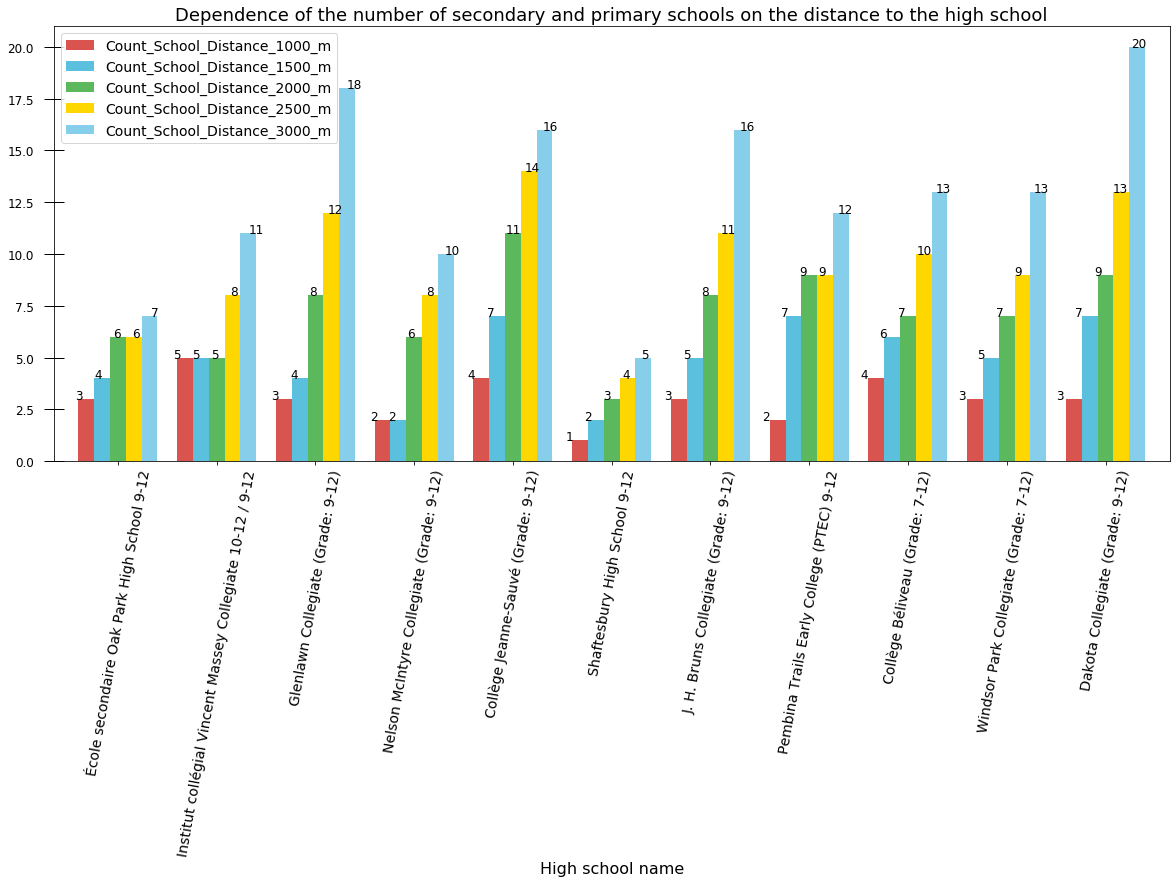

In [1232]:
import matplotlib.ticker as ticker

fig = plt.figure()
n=0
colors_list =['#d9534f','#5bc0de','#5cb85c','gold', 'skyblue']

ax=df_count_Schooll_distance.plot(kind='bar', 
                   figsize=(20,8),
                   width=0.8, fontsize=14,rot=80,
                   color=colors_list) # rotate the bars by 90 degrees
ax.set_facecolor('white')
ax.tick_params(axis='y',  which = 'major',    
               direction = 'inout',   
               length = 20,   
               width = 1,     
               color = 'black',    
               pad = 10,   
               labelsize = 12,   
               labelcolor = 'black',   
               bottom = False,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )

for i in range(0,11):
    for j in range(0,5):
        plt.annotate(df_count_Schooll_distance.iloc[i,j],
                     xy=((n*0.1788+i*0.099+j*0.012-0.43), 
                         df_count_Schooll_distance.iloc[i,j]),  fontsize=12, color='black')
        n+=1

ax.set_xlabel('High school name', fontsize=16)
ax.set_title('Dependence of the number of secondary and primary schools on the distance to the high school', fontsize=18)
plt.legend(fontsize=14) 
plt.show()

In [777]:
df_grad_s.describe()

,Distance_High_Secondary,Enrollment_High,Enrollment_Secondary,Average_mark_High,Average_mark_Secondary
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,1787.432624,773.836879,308.063830,3.375887,3.887234
std,788.774722,354.194410,149.705149,1.084363,0.959974
min,101.000000,55.000000,51.000000,0.000000,0.000000
25%,1068.000000,604.000000,198.000000,3.400000,3.400000
50%,1884.000000,800.000000,318.000000,3.600000,4.000000
75%,2513.000000,1059.000000,383.000000,3.800000,4.600000
max,2978.000000,1235.000000,1335.000000,4.300000,5.000000


Let's show the distribution of distance High&Secondary school in a way that facilitates comparisons between Neighbourhoods.

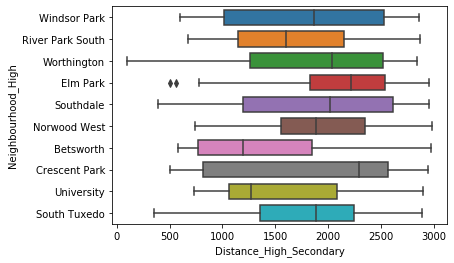

In [778]:
sns.boxplot(x=df_grad_s["Distance_High_Secondary"], y=df_grad_s["Neighbourhood_High"], width=0.7);
plt.show()

In [783]:
df_high_count=df_high.merge(df_count_Schooll_distance)

In [1137]:
df_high_count = pd.read_excel('D:\df_high.xlsx')

In [1138]:
df_high_count.describe()

,Program_English,Program_French,Latitude,Longitude,Enrollment,Average_mark,count_review,SK,Kindergarten,K_8,H_9_12,Count_School_Distance_1000_m,Count_School_Distance_1500_m,Count_School_Distance_2000_m,Count_School_Distance_2500_m,Count_School_Distance_3000_m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.818182,0.363636,49.846108,-97.136738,737.363636,3.336364,18.727273,1.0,0.090909,0.0,1.0,3.000000,4.909091,7.181818,9.454545,12.818182
std,0.404520,0.504525,0.020889,0.072938,362.751781,1.149150,10.257591,0.0,0.301511,0.0,0.0,1.095445,1.814086,2.182576,2.978712,4.534715
min,0.000000,0.000000,49.801995,-97.309285,55.000000,0.000000,0.000000,1.0,0.000000,0.0,1.0,1.000000,2.000000,3.000000,4.000000,5.000000
25%,1.000000,0.000000,49.837529,-97.149216,595.000000,3.450000,13.500000,1.0,0.000000,0.0,1.0,2.500000,4.000000,6.000000,8.000000,10.500000
50%,1.000000,0.000000,49.850943,-97.112557,754.000000,3.600000,19.000000,1.0,0.000000,0.0,1.0,3.000000,5.000000,7.000000,9.000000,13.000000
75%,1.000000,1.000000,49.859447,-97.088967,967.500000,3.750000,23.500000,1.0,0.000000,0.0,1.0,3.500000,6.500000,8.500000,11.500000,16.000000
max,1.000000,1.000000,49.875913,-97.071911,1235.000000,4.300000,37.000000,1.0,1.000000,0.0,1.0,5.000000,7.000000,11.000000,14.000000,20.000000


We use the clustering method to find schools with similar characteristics.

In [63]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [808]:
df_Schooll_grad.head()

,School_name,Adres,Phone_Number,Program,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,count_review,Description,SK,Kindergarten,K_8,H_9_12
0,Arc​hwood School,800Archibald,(204) 233-7983,English,K-8,Stock Yards,St. Boniface,Louis Riel,49.876055,-97.095295,186,3.6,7,Archwood School (Grade: K-8),0,1,1,0
1,Collège Béliveau,296Speers,(204) 255-3205,French Immersion,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911,586,3.2,13,Collège Béliveau (Grade: 7-12),1,0,0,1
2,Collège Jeanne-Sauvé,1128Dakota,(204) 257-0124,French Immersion,9-12,River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362,648,4.1,8,Collège Jeanne-Sauvé (Grade: 9-12),1,0,0,1
3,Dakota Collegiate,661Dakota,(204) 256-4366,English,9-12,Worthington,St. Vital,Louis Riel,49.835262,-97.109537,1235,3.4,27,Dakota Collegiate (Grade: 9-12),1,0,0,1
4,Darwin School,175Darwin,(204) 257-2904,English,K-8,Minnetonka,St. Vital,Louis Riel,49.826043,-97.119823,238,5.0,6,Darwin School (Grade: K-8),0,1,1,0


In [1047]:
neighborhood_latitude = df_Schooll_grad.loc[1, 'Latitude'] 
neighborhood_longitude = df_Schooll_grad.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_Schooll_grad.loc[1, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Windsor Park are 49.86331141578138, -97.07191111634015.


We use Foursquare API to generate a list of venues per borough:

In [1048]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [1049]:
results = requests.get(url).json()

In [1050]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [1051]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Winakwa Community Club,Event Space,49.863487,-97.073956
1,Bus Stop #50053,Bus Station,49.865327,-97.072295
2,BJ's Music DJ Service,Theme Park,49.864699,-97.075784
3,Mac's,Convenience Store,49.862807,-97.077394
4,Vincent Massey Park,Park,49.866227,-97.068326


In [1052]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [1053]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1054]:
Winnipeg_venues = getNearbyVenues(names=df_Schooll_grad['Neighbourhood'],
                                   latitudes=df_Schooll_grad['Latitude'],
                                   longitudes=df_Schooll_grad['Longitude']
                                  )

Stock Yards
Windsor Park
River Park South
Worthington
Minnetonka
Vista
River Park South
Niakwa Place
Central St. Boniface
Windsor Park
Dakota Crossing
Pulberry
Central St. Boniface
Sage Creek
River Park South
Southdale
Varennes
Windsor Park
Windsor Park
Elm Park
Glenwood
Dakota Crossing
Pulberry
River Park South
Island Lakes
Southdale
Lavalee
Maginot
Central St. Boniface
Minnetonka
Norwood West
Niakwa Place
Norwood West
River Park South
Southdale
St. George
Meadowood
Worthington
Windsor Park
Elm Park
Fort Richmond
Waverley Heights
Richmond West
Betsworth
Westdale
Waverley Heights
Fort Richmond
Eric Coy
Crescent Park
Eric Coy
Waverley Heights
Betsworth
South Pointe
Fort Richmond
Tuxedo
Linden Woods
Point Road
Fort Richmond
Beaumont
Whyte Ridge
Crescent Park
Tuxedo
Linden Woods
Crescent Park
Elmhurst
University
University
Maybank
River West Park
Varsity View
Fort Richmond
South Tuxedo
Westdale
Westdale
Whyte Ridge


In [1055]:
print(Winnipeg_venues.shape)
Winnipeg_venues.head()

(384, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Stock Yards,49.876055,-97.095295,Fort Garry Curling Club,49.879755,-97.097573,Athletics & Sports
1,Windsor Park,49.863311,-97.071911,Winakwa Community Club,49.863487,-97.073956,Event Space
2,Windsor Park,49.863311,-97.071911,Bus Stop #50053,49.865327,-97.072295,Bus Station
3,Windsor Park,49.863311,-97.071911,BJ's Music DJ Service,49.864699,-97.075784,Theme Park
4,Windsor Park,49.863311,-97.071911,Mac's,49.862807,-97.077394,Convenience Store


Lets create a dataframe to generate table of counts of venue per borough and plot it on a bar chart:

In [1056]:
df = Winnipeg_venues.groupby('Neighbourhood')['Venue'].count().reset_index()
df.head()

,Neighbourhood,Venue
0,Beaumont,3
1,Betsworth,2
2,Central St. Boniface,43
3,Crescent Park,32
4,Dakota Crossing,5


In [1057]:
df.set_index('Neighbourhood', inplace=True)

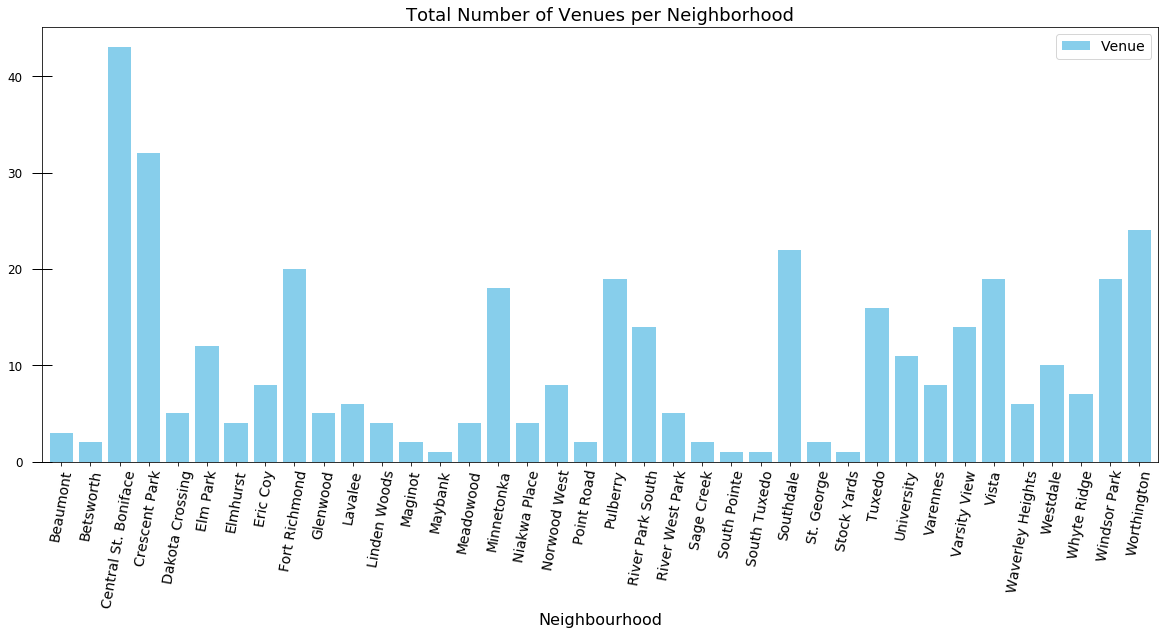

In [1058]:
ax=df.plot(kind='bar', 
                   figsize=(20,8),
                   width=0.8, fontsize=14,rot=80,
                   color='skyblue')
ax.set_facecolor('white')
ax.tick_params(axis='y',  which = 'major',    
               direction = 'inout',   
               length = 20,   
               width = 1,     
               color = 'black',    
               pad = 10,   
               labelsize = 12,   
               labelcolor = 'black',   
               bottom = False,   
               top = True,    
               left = True,    
               labelbottom = True,    
               labeltop = True,   
               labelleft = True,   
              )
ax.set_xlabel('Neighbourhood', fontsize=16)
ax.set_title('Total Number of Venues per Neighborhood', fontsize=18)
plt.legend(fontsize=14) 
plt.show()

In [1059]:
Winnipeg_onehot = pd.get_dummies(Winnipeg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Winnipeg_onehot['Neighbourhood'] =Winnipeg_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Winnipeg_onehot.columns[-1]] + list(Winnipeg_onehot.columns[:-1])
Winnipeg_onehot = Winnipeg_onehot[fixed_columns]

Winnipeg_onehot

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,...,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Trail,Tree,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Stock Yards,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Windsor Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Windsor Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Windsor Park,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Windsor Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Westdale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,Westdale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,Whyte Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,Whyte Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1060]:
Winnipeg_grouped = Winnipeg_onehot.groupby('Neighbourhood').mean().reset_index()
Winnipeg_grouped.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,...,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Trail,Tree,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Beaumont,0.000000,0.0,0.333333,0.0000,0.000000,0.000000,0.333333,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0
1,Betsworth,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0
2,Central St. Boniface,0.069767,0.0,0.000000,0.0000,0.023256,0.093023,0.000000,0.0,0.0,...,0.046512,0.046512,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0
3,Crescent Park,0.031250,0.0,0.031250,0.0625,0.000000,0.062500,0.031250,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.03125,0.0625,0.0,0.0
4,Dakota Crossing,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.2,0.0,0.0,0.00000,0.0000,0.0,0.0


We create a table with entertainment for children in each area:

In [1061]:
Sport_data= Winnipeg_grouped[['Neighbourhood','Dance Studio','Sports Club', 'Football Stadium','Gym', 'Bowling Alley',
                              'Gym / Fitness Center', 'Soccer Field','Stadium',
                              'Athletics & Sports', 'Baseball Field','Event Space','Park']]
Sport_data.head()

,Neighbourhood,Dance Studio,Sports Club,Football Stadium,Gym,Bowling Alley,Gym / Fitness Center,Soccer Field,Stadium,Athletics & Sports,Baseball Field,Event Space,Park
0,Beaumont,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.333333
1,Betsworth,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000
2,Central St. Boniface,0.0,0.0,0.0,0.0,0.046512,0.046512,0.0,0.0,0.0000,0.0,0.0,0.023256
3,Crescent Park,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0625,0.0,0.0,0.000000
4,Dakota Crossing,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000


In [1063]:
num_top_venues = 5

for hood in Sport_data['Neighbourhood']:
    print("----"+hood+"----")
    temp = Sport_data[Sport_data['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beaumont----
              venue  freq
0              Park  0.33
1      Dance Studio  0.00
2       Sports Club  0.00
3  Football Stadium  0.00
4               Gym  0.00


----Betsworth----
              venue  freq
0      Dance Studio   0.0
1       Sports Club   0.0
2  Football Stadium   0.0
3               Gym   0.0
4     Bowling Alley   0.0


----Central St. Boniface----
                  venue  freq
0         Bowling Alley  0.05
1  Gym / Fitness Center  0.05
2                  Park  0.02
3          Dance Studio  0.00
4           Sports Club  0.00


----Crescent Park----
                venue  freq
0  Athletics & Sports  0.06
1        Dance Studio  0.00
2         Sports Club  0.00
3    Football Stadium  0.00
4                 Gym  0.00


----Dakota Crossing----
              venue  freq
0      Dance Studio   0.0
1       Sports Club   0.0
2  Football Stadium   0.0
3               Gym   0.0
4     Bowling Alley   0.0


----Elm Park----
                  venue  freq
0  Gym / Fitness 

In [1064]:
def return_most_common_venues(row, num_top_venues): 
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1066]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] =Sport_data['Neighbourhood']

for ind in np.arange(Sport_data.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sport_data.iloc[ind, :],
                                                                          num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beaumont,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
1,Betsworth,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
2,Central St. Boniface,Gym / Fitness Center,Bowling Alley,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym,Football Stadium
3,Crescent Park,Athletics & Sports,Park,Event Space,Baseball Field,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
4,Dakota Crossing,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium


In [1139]:
Sport_data_merged = df_high_count.join(Sport_data.set_index('Neighbourhood'), on='Neighbourhood')
Sport_data_merged.head(5)

,School_name,Adres,Phone_Number,Program_English,Program_French,Grade,Neighbourhood,Ward,School_Division,Latitude,...,Football Stadium,Gym,Bowling Alley,Gym / Fitness Center,Soccer Field,Stadium,Athletics & Sports,Baseball Field,Event Space,Park
0,​École secondaire Oak Park High School,​820Charleswood,​204.895.7221,1,1,​9-12,Betsworth,Charleswood - Tuxedo - Westwood,Pembina Trails,49.850943,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
1,​Institut collégial Vincent Massey Collegiate,​975Dowker,​204.453.8023,1,1,​10-12 / 9-12,Crescent Park,Fort Rouge - East Fort Garry,Pembina Trails,49.839795,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0625,0.0,0.000000,0.000000
2,​Pembina Trails Early College (PTEC),100Innovation,​204.560.1999,1,0,​9-12,University,St. Norbert - Seine River,Pembina Trails,49.801995,...,0.272727,0.272727,0.0,0.0,0.181818,0.090909,0.0000,0.0,0.000000,0.000000
3,​Shaftesbury High School,​2240Grant,​204.888.5898,1,0,​9-12,South Tuxedo,Charleswood - Tuxedo - Westwood,Pembina Trails,49.857177,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
4,Collège Béliveau,296Speers,(204) 255-3205,0,1,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.105263,0.052632


In [1140]:
Sport_data_group = Sport_data_merged.groupby('School_name').mean().reset_index()

In [1199]:
Sport_data_group.head(5)

,School_name,Program_English,Program_French,Latitude,Longitude,Enrollment,Average_mark,count_review,SK,Kindergarten,...,Football Stadium,Gym,Bowling Alley,Gym / Fitness Center,Soccer Field,Stadium,Athletics & Sports,Baseball Field,Event Space,Park
0,Collège Béliveau,0,1,49.863311,-97.071911,586,3.2,13,1,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.105263,0.052632
1,Collège Jeanne-Sauvé,0,1,49.820884,-97.100362,648,4.1,8,1,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.000000,0.000000
2,Dakota Collegiate,1,0,49.835262,-97.109537,1235,3.4,27,1,0,...,0.0,0.000000,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Glenlawn Collegiate,1,0,49.853106,-97.112557,1059,4.3,30,1,0,...,0.0,0.000000,0.000000,0.166667,0.166667,0.0,0.000000,0.000000,0.000000,0.000000
4,J. H. Bruns Collegiate,1,0,49.847087,-97.077573,800,3.6,14,1,0,...,0.0,0.045455,0.000000,0.000000,0.045455,0.0,0.000000,0.045455,0.000000,0.000000


Let's choose the data to use for clustering: 
Enrollment of school, program English or French, average mark, the number of secondary schools is closer than 1000 meters, area where there is soccer field or stadium, baseball field, bowling alley, dance studio, sports club, football stadium, gym, fitness center, event space, park.

In [1264]:
Feature = Sport_data_group[['Enrollment','Program_English','Program_French','Average_mark',
                            'Count_School_Distance_1000_m',
                            'Soccer Field', 'Stadium', 'Baseball Field', 'Bowling Alley',
                           'Dance Studio','Sports Club', 'Football Stadium','Gym', 
                              'Gym / Fitness Center', 'Event Space','Park']]

In [1265]:
X = Feature

In [1266]:
scaler = MinMaxScaler()

In [1267]:
X_scaled=scaler.fit_transform(X)

In [1268]:
X[0:5]

,Enrollment,Program_English,Program_French,Average_mark,Count_School_Distance_1000_m,Soccer Field,Stadium,Baseball Field,Bowling Alley,Dance Studio,Sports Club,Football Stadium,Gym,Gym / Fitness Center,Event Space,Park
0,586,0,1,3.2,4,0.000000,0.0,0.000000,0.000000,0.052632,0.0,0.0,0.000000,0.000000,0.105263,0.052632
1,648,0,1,4.1,4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1235,1,0,3.4,3,0.000000,0.0,0.000000,0.083333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,1059,1,0,4.3,3,0.166667,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.000000
4,800,1,0,3.6,3,0.045455,0.0,0.045455,0.000000,0.000000,0.0,0.0,0.045455,0.000000,0.000000,0.000000


Determine the optimal number of clusters using the elbow method:

In [1269]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    

Score for number of cluster(s) 2: -13.329255119264937
Silhouette score for number of cluster(s) 2: 0.3114670845874319
Davies Bouldin score for number of cluster(s) 2: 0.4913847961386405
Score for number of cluster(s) 3: -9.463704172263185
Silhouette score for number of cluster(s) 3: 0.16758210771123297
Davies Bouldin score for number of cluster(s) 3: 1.1153887392919009
Score for number of cluster(s) 4: -6.631819831815628
Silhouette score for number of cluster(s) 4: 0.19089382701024035
Davies Bouldin score for number of cluster(s) 4: 0.9375882678919891
Score for number of cluster(s) 5: -4.69324465581189
Silhouette score for number of cluster(s) 5: 0.1918711814515892
Davies Bouldin score for number of cluster(s) 5: 0.7993606790080904
Score for number of cluster(s) 6: -3.250007332456879
Silhouette score for number of cluster(s) 6: 0.1891215725774158
Davies Bouldin score for number of cluster(s) 6: 0.6637315831206636


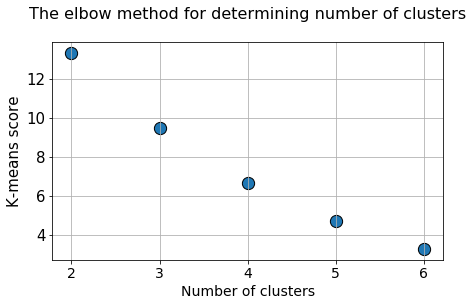

In [1270]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

You can't determine how many clusters to take from the elbow method, so we use the silhouette coefficient method and Davies-Bouldin score:

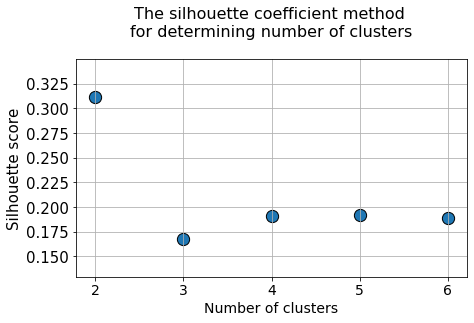

In [1271]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,7)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

The range of Silhouette score is [-1, 1]. Its analysis is as follows −

    +1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

    0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

    -1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

The calculation of Silhouette score can be done by using the following formula:

silhouettescore=(p−q)/max(p,q)

Here, p = mean distance to the points in the nearest cluster

And, q = mean intra-cluster distance to all the points.

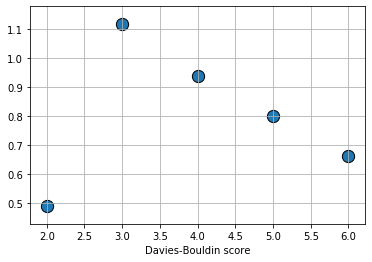

In [1272]:
plt.scatter(x=[i for i in range(2,7)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

This is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. This has a drawback that a good value reported by this method does not imply the best information retrieval. Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation, a lower value will mean that the clustering is better. It happens to be the average similarity between each cluster and its most similar one, averaged over all the clusters, where the similarity is defined as Si above. This affirms the idea that no cluster has to be similar to another, and hence the best clustering scheme essentially minimizes the Davies–Bouldin index.( https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index )

###### Therefore, the most appropriate number of clusters is 3.

In [1273]:
kclusters = 3

#Sport_data_clustering = FeatureCl.drop('School_name', 1)
Sport_data_clustering = Feature
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Sport_data_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

array([1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1])

In [1274]:
# merge neighborhoods_venues_sorted with df_high_count_data to add latitude/longitude for each neighborhood
df_high_count_merged = df_high_count.merge(neighborhoods_venues_sorted)
df_high_count_merged.insert(0, 'Cluster Labels', kmeans.labels_)
df_high_count_merged.head() 

,Cluster Labels,School_name,Adres,Phone_Number,Program_English,Program_French,Grade,Neighbourhood,Ward,School_Division,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,​École secondaire Oak Park High School,​820Charleswood,​204.895.7221,1,1,​9-12,Betsworth,Charleswood - Tuxedo - Westwood,Pembina Trails,...,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
1,1,​Institut collégial Vincent Massey Collegiate,​975Dowker,​204.453.8023,1,1,​10-12 / 9-12,Crescent Park,Fort Rouge - East Fort Garry,Pembina Trails,...,Athletics & Sports,Park,Event Space,Baseball Field,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
2,2,​Pembina Trails Early College (PTEC),100Innovation,​204.560.1999,1,0,​9-12,University,St. Norbert - Seine River,Pembina Trails,...,Gym,Football Stadium,Soccer Field,Stadium,Park,Event Space,Baseball Field,Athletics & Sports,Gym / Fitness Center,Bowling Alley
3,2,​Shaftesbury High School,​2240Grant,​204.888.5898,1,0,​9-12,South Tuxedo,Charleswood - Tuxedo - Westwood,Pembina Trails,...,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
4,1,Collège Béliveau,296Speers,(204) 255-3205,0,1,7-12,Windsor Park,St. Boniface,Louis Riel,...,Event Space,Park,Dance Studio,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym


Lets explore each cluster to find common characteristics:

In [1275]:
df_high_count_merged.loc[df_high_count_merged['Cluster Labels'] == 0,
                   df_high_count_merged.columns[[1] + list(range(5, df_high_count_merged.shape[1]))]]

,School_name,Program_French,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Windsor Park Collegiate,0,7-12,Windsor Park,St. Boniface,Louis Riel,49.861717,-97.074338,604,3.6,...,Event Space,Park,Dance Studio,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym
8,Glenlawn Collegiate,0,9-12,Elm Park,St. Vital,Louis Riel,49.853106,-97.112557,1059,4.3,...,Soccer Field,Gym / Fitness Center,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Bowling Alley,Gym,Football Stadium


In [1276]:
df_high_count_merged.loc[df_high_count_merged['Cluster Labels'] == 1,
                   df_high_count_merged.columns[[1] + list(range(5, df_high_count_merged.shape[1]))]]

,School_name,Program_French,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,​École secondaire Oak Park High School,1,​9-12,Betsworth,Charleswood - Tuxedo - Westwood,Pembina Trails,49.850943,-97.309285,876,3.5,...,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
1,​Institut collégial Vincent Massey Collegiate,1,​10-12 / 9-12,Crescent Park,Fort Rouge - East Fort Garry,Pembina Trails,49.839795,-97.150349,1209,3.5,...,Athletics & Sports,Park,Event Space,Baseball Field,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
4,Collège Béliveau,1,7-12,Windsor Park,St. Boniface,Louis Riel,49.863311,-97.071911,586,3.2,...,Event Space,Park,Dance Studio,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym
6,Collège Jeanne-Sauvé,1,9-12,River Park South,St. Norbert - Seine River,Louis Riel,49.820884,-97.100362,648,4.1,...,Athletics & Sports,Park,Event Space,Baseball Field,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
9,J. H. Bruns Collegiate,0,9-12,Southdale,St. Boniface,Louis Riel,49.847087,-97.077573,800,3.6,...,Baseball Field,Soccer Field,Gym,Park,Event Space,Athletics & Sports,Stadium,Gym / Fitness Center,Bowling Alley,Football Stadium
10,Nelson McIntyre Collegiate,0,9-12,Norwood West,St. Boniface,Louis Riel,49.875913,-97.120603,285,3.7,...,Park,Bowling Alley,Gym,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Football Stadium


In [1277]:
df_high_count_merged.loc[df_high_count_merged['Cluster Labels'] == 2,
                   df_high_count_merged.columns[[1] + list(range(5, df_high_count_merged.shape[1]))]]

,School_name,Program_French,Grade,Neighbourhood,Ward,School_Division,Latitude,Longitude,Enrollment,Average_mark,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,​Pembina Trails Early College (PTEC),0,​9-12,University,St. Norbert - Seine River,Pembina Trails,49.801995,-97.148083,55,0.0,...,Gym,Football Stadium,Soccer Field,Stadium,Park,Event Space,Baseball Field,Athletics & Sports,Gym / Fitness Center,Bowling Alley
3,​Shaftesbury High School,0,​9-12,South Tuxedo,Charleswood - Tuxedo - Westwood,Pembina Trails,49.857177,-97.229520,754,3.8,...,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Bowling Alley,Gym,Football Stadium
7,Dakota Collegiate,0,9-12,Worthington,St. Vital,Louis Riel,49.835262,-97.109537,1235,3.4,...,Bowling Alley,Park,Event Space,Baseball Field,Athletics & Sports,Stadium,Soccer Field,Gym / Fitness Center,Gym,Football Stadium


Let's put labels on the map:

In [1278]:
Sport_data_map_clusters = folium.Map(location=[49.836362, -97.159234], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
def color_change(elev):
    if elev ==0:
        return('green')
    elif elev==1:
        return('orange')
    else:
        return('red')
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_high_count_merged['Latitude'], df_high_count_merged['Longitude'], 
                                  df_high_count_merged['School_name'], df_high_count_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        location=[lat+0.001, lon],
        icon=folium.Icon(color_change(cluster-1) ),
        popup=label,
        ).add_to(Sport_data_map_clusters)
       
Sport_data_map_clusters

Let's combine a map with labels and a map with school characteristics to see which schools are similar in terms of the property taken:

In [1279]:

for lat, lng, label, evol, num, grad  in zip(df_Schooll_PM_LR['Latitude'], df_Schooll_PM_LR['Longitude'],
                                            df_Schooll_PM_LR['Description'], df_Schooll_PM_LR['Average_mark'], 
                                            df_Schooll_PM_LR['Enrollment'], df_Schooll_PM_LR['SK']):
    if grad==1:
        col='#d9534f'
    elif grad==0:
        col='skyblue'
    else:
        col='blue'
    
    if evol >= 4:
        col_fil='green'
    elif evol<4 and evol>=2:
        col_fil='yellow'
    elif evol<2 and evol>0:
        col_fil='red'
    else:
        col='black'
        
    folium.features.CircleMarker(
        [lat, lng],
        radius=math.ceil(num/100), # define how big you want the circle markers to be
        color=col,  
        fill=True,
        popup=label,
        fill_color=col_fil,
        fill_opacity=0.9
    ).add_to(Sport_data_map_clusters)

# show map
Sport_data_map_clusters

This map shows areas where you can rent or buy housing, depending on the requirements for the school (for example, what language classes are taught or whether there is a Park nearby).